In [1]:
library(tidyverse)
library(repr)
library(tidymodels)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘tidymodels’ was built under R version 4.0.2”
── Attaching packages ────────────────────────────────────── tidymodels 0.1.1 ──

✔ broom     0.7.0      ✔ recipes   0.1.13
✔ dials     0.0.9      ✔ rsample   0.0.7 
✔ infer     0.5.4      ✔ tune      0.1.1 
✔ modeldata 0.0.2      ✔ workflows 0.2.0 
✔ parsnip   0.1.3    

In [2]:
weather <- read_csv("https://raw.githubusercontent.com/DylanqrH/rain/main/weatherAUS.csv", guess_max = 10000)
weather

Parsed with column specification:
cols(
  .default = col_double(),
  Date = col_date(format = ""),
  Location = col_character(),
  WindGustDir = col_character(),
  WindDir9am = col_character(),
  WindDir3pm = col_character(),
  RainToday = col_character(),
  RainTomorrow = col_character()
)

See spec(...) for full column specifications.



Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,⋯,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
<date>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
2008-12-01,Albury,13.4,22.9,0.6,NA,NA,W,44,W,⋯,71,22,1007.7,1007.1,8,NA,16.9,21.8,No,No
2008-12-02,Albury,7.4,25.1,0.0,NA,NA,WNW,44,NNW,⋯,44,25,1010.6,1007.8,NA,NA,17.2,24.3,No,No
2008-12-03,Albury,12.9,25.7,0.0,NA,NA,WSW,46,W,⋯,38,30,1007.6,1008.7,NA,2,21.0,23.2,No,No
2008-12-04,Albury,9.2,28.0,0.0,NA,NA,NE,24,SE,⋯,45,16,1017.6,1012.8,NA,NA,18.1,26.5,No,No
2008-12-05,Albury,17.5,32.3,1.0,NA,NA,W,41,ENE,⋯,82,33,1010.8,1006.0,7,8,17.8,29.7,No,No
2008-12-06,Albury,14.6,29.7,0.2,NA,NA,WNW,56,W,⋯,55,23,1009.2,1005.4,NA,NA,20.6,28.9,No,No
2008-12-07,Albury,14.3,25.0,0.0,NA,NA,W,50,SW,⋯,49,19,1009.6,1008.2,1,NA,18.1,24.6,No,No
2008-12-08,Albury,7.7,26.7,0.0,NA,NA,W,35,SSE,⋯,48,19,1013.4,1010.1,NA,NA,16.3,25.5,No,No
2008-12-09,Albury,9.7,31.9,0.0,NA,NA,NNW,80,SE,⋯,42,9,1008.9,1003.6,NA,NA,18.3,30.2,No,Yes


In [3]:
weather_Darwin <- weather %>%
                  filter(Location == "Darwin") %>%
                  select(Evaporation, Sunshine, WindSpeed9am, Humidity3pm, Pressure3pm, Rainfall, MinTemp, MaxTemp, RainTomorrow) %>%
                  mutate(RainTomorrow = as.factor(RainTomorrow)) %>%
                  drop_na()
weather_Darwin

Evaporation,Sunshine,WindSpeed9am,Humidity3pm,Pressure3pm,Rainfall,MinTemp,MaxTemp,RainTomorrow
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
4.4,11.0,13,32,1012.1,0,20.0,33.1,No
6.0,10.4,15,17,1012.4,0,19.4,32.4,No
8.0,11.0,22,24,1013.0,0,18.2,31.8,No
7.0,10.4,22,16,1013.6,0,17.3,30.7,No
7.0,10.8,20,16,1012.6,0,15.5,30.8,No
7.2,10.7,11,18,1012.2,0,16.2,31.9,No
5.2,7.8,11,18,1013.1,0,17.0,32.7,No
9.2,10.6,20,12,1014.6,0,19.6,30.8,No
9.6,10.6,31,15,1015.2,0,17.3,29.2,No


In [4]:
set.seed(999)
weather_split <- initial_split(weather_Darwin, prop = 0.75, strata = RainTomorrow)  
weather_train <- training(weather_split)   
weather_test <- testing(weather_split)
head(weather_train)
head(weather_test)

Evaporation,Sunshine,WindSpeed9am,Humidity3pm,Pressure3pm,Rainfall,MinTemp,MaxTemp,RainTomorrow
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
4.4,11.0,13,32,1012.1,0,20.0,33.1,No
8.0,11.0,22,24,1013.0,0,18.2,31.8,No
7.0,10.4,22,16,1013.6,0,17.3,30.7,No
7.0,10.8,20,16,1012.6,0,15.5,30.8,No
9.2,10.6,20,12,1014.6,0,19.6,30.8,No
9.6,10.6,31,15,1015.2,0,17.3,29.2,No


Evaporation,Sunshine,WindSpeed9am,Humidity3pm,Pressure3pm,Rainfall,MinTemp,MaxTemp,RainTomorrow
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
6.0,10.4,15,17,1012.4,0,19.4,32.4,No
7.2,10.7,11,18,1012.2,0,16.2,31.9,No
5.2,7.8,11,18,1013.1,0,17.0,32.7,No
4.8,8.9,7,56,1012.1,0,18.8,31.0,No
5.4,10.9,22,36,1009.0,0,21.4,32.7,No
10.8,10.5,28,19,1010.3,0,17.3,29.1,No


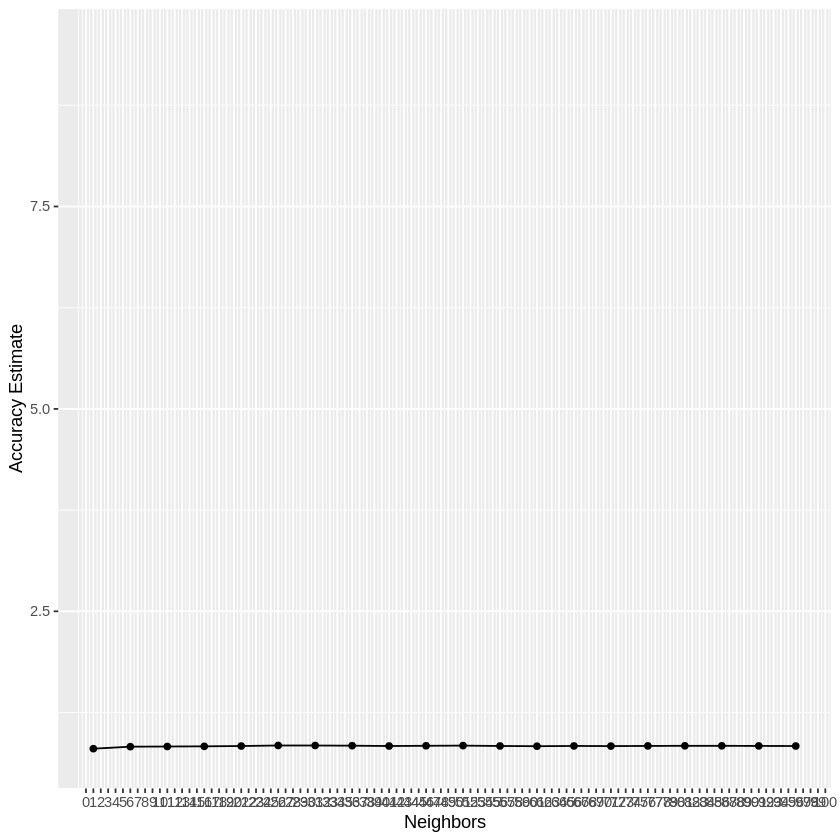

In [5]:
tranning_recipe <- recipe(RainTomorrow ~ ., data = weather_train)
training_vfold <- vfold_cv(weather_train, v = 5, strata = RainTomorrow)

knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) %>%
       set_engine("kknn") %>%
       set_mode("classification")
k_vals <- tibble(neighbors = seq(from = 1, to = 100, by = 5))
knn_result <- workflow() %>%
       add_recipe(tranning_recipe) %>%
       add_model(knn_spec) %>%
       tune_grid(resamples = training_vfold, grid = k_vals) %>%
       collect_metrics() 

accuracies <- knn_result %>% 
       filter(.metric == "accuracy")

cross_val_plot <- ggplot(accuracies, aes(x = neighbors, y = mean))+
       geom_point() +
       geom_line() +
       labs(x = "Neighbors", y = "Accuracy Estimate") +
       scale_x_continuous(breaks = seq(0, 200, by = 1)) + 
       scale_y_continuous(limits = c(0.75, 9.50)) 
cross_val_plot

In [6]:
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 5) %>%
       set_engine("kknn") %>%
       set_mode("classification")

weather_recipe <- recipe(RainTomorrow ~ ., 
                              data = weather_train, na.rm = TRUE) %>%
                        step_scale(all_predictors()) %>%
                        step_center(all_predictors())

weather_fit <- workflow() %>%
          add_recipe(weather_recipe) %>%
          add_model(knn_spec) %>%
          fit(data = weather_train)

weather_fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

● step_scale()
● step_center()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = ~5, kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.1741166
Best kernel: rectangular
Best k: 5

In [32]:
weather_all_predicted <- predict(weather_fit, weather_test) %>%
                         bind_cols(weather_test)
weather_metrics <- weather_all_predicted %>%
         metrics(truth = RainTomorrow, estimate = .pred_class)
weather_metrics

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.8301405
kap,binary,0.5470110
